# Pymaceuticals Inc.
---
DATA ANAYSIS
For this study, Pymaceuticals Inc. examined their drug of interest Capomulin vs. other drug regimens for the treatment of Squamous Cell Carcinoma (SCC) which is a form of skin cancer.  When looking at the Summary Statistics table, the tumor size of the test subjects receiving Capomulin and Ramicane appear to be approximately 26% smaller than the eight other drug regimens in the study.  In the Bar Chart examining the Timepoints throughout the study by drug regimen, Capomulin and Ramicane again appear the outperforming the other drug regimens in the study.  As the analysis digs deeper utilizing a Box Plot to examine tumor size vs drug regimens, Capomulin and Ramicane again appear to show significantly improved results with the mean values in the high 30mm3.  In comparison, Infubinol and Ceftaminhave produced mean values in the 60mm3 range.  When looking specifically at Capomulin, the Line Plot shows slow tumor growth in the first 20 days and then a significant reduction (8%) in overall tumor size from days 20 to 35.  Finally, the Scatter Plot with a Correlation and Regression overlay shows a strong positive correlation between tumor volume and subject weight.  In total, these initial trial studies highlight a potential positive upside for Capomulin in the treatment of Squamous Cell Carcinoma (SCC) and may warrant longer term studies on the efficacy of future Capomulin treatments.  


In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_data_complete = pd.merge( study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
mice_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# Checking the number of mice.
mice_count = len(mice_data_complete["Mouse ID"].unique())

mice_count


249

In [28]:

# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_id = mice_data_complete.loc[mice_data_complete.duplicated(subset = ["Mouse ID","Timepoint"]), "Mouse ID"].unique()

duplicate_mice_id

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_id_data = mice_data_complete.loc[mice_data_complete["Mouse ID"] == duplicate_mice_id[0], :]

duplicate_mice_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mice_data_complete[mice_data_complete["Mouse ID"].isin(duplicate_mice_id)==False]

clean_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [31]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_mice_df["Mouse ID"].unique())

clean_mice_count

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mice_tumor_mean = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).mean()
mice_tumor_median = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).median()
mice_tumor_var = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).var()
mice_tumor_std = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).std()
mice_tumor_sem = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).sem()


tumor_summary = pd.DataFrame({"Mean Tumor Volume": mice_tumor_mean, 
                              "Median Tumor Volume": mice_tumor_median, 
                              "Tumor Volume Variance": mice_tumor_var, 
                              "Tumor Volume Std. Dev.": mice_tumor_std, 
                              "Tumor Volume Std. Err.": mice_tumor_sem})



tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_summary_aggerate = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])

tumor_summary_aggerate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

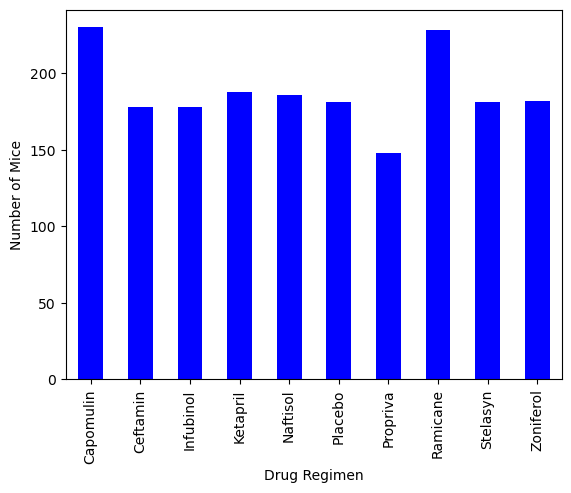

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_timeplot_count = clean_mice_df["Mouse ID"].groupby(clean_mice_df["Drug Regimen"]).count()


#mice_timeplot_count
plot_pandas = mice_timeplot_count.plot.bar(color='b')  
# Set the xlabel, ylabel
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


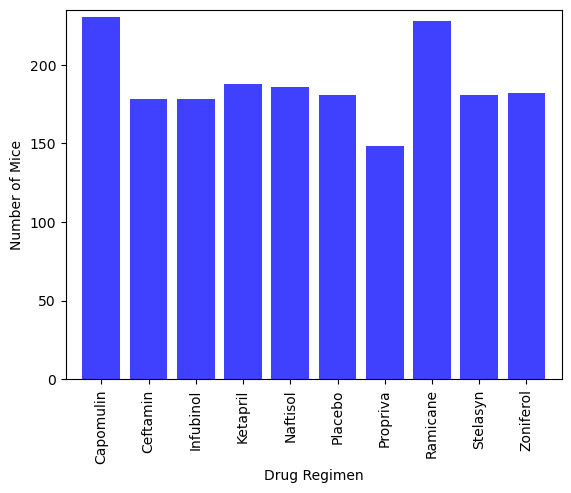

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = clean_mice_df["Drug Regimen"].sort_values().unique()
y_axis = mice_timeplot_count

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis) + 5)


plt.bar(x_axis, y_axis, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, x_axis)
plt.xticks(rotation="vertical")
plt.show()

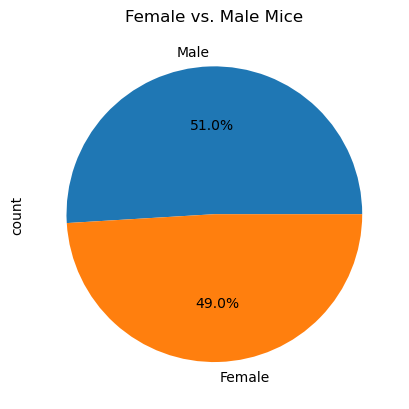

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender_data = clean_mice_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
mice_gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


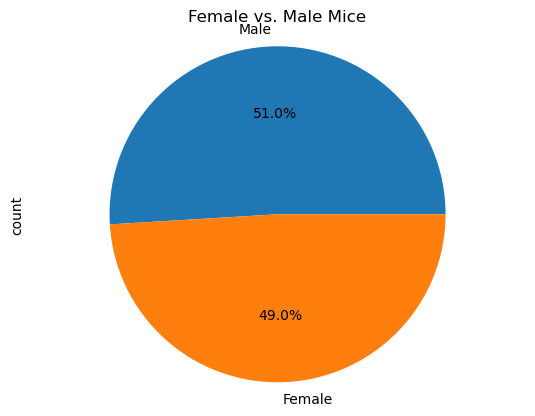

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender = ["Male", "Female"]
mice_gender_percentage = clean_mice_df["Sex"].value_counts()
explode = (0, 0)


plt.title("Female vs. Male Mice")
plt.ylabel("count")
plt.pie(mice_gender_percentage, labels=mice_gender, autopct="%1.1f%%", startangle=0)
        
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


mice_results_capomulin = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin",:]
mice_results_ramicane = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane",:]
mice_results_infubinol = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol", :]
mice_results_ceftamin = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin", :]




# Start by getting the last (greatest) timepoint for each mouse

capomulin_last_timeplot = mice_results_capomulin["Timepoint"].groupby(mice_results_capomulin["Mouse ID"]).max()
ramicane_last_timeplot = mice_results_ramicane["Timepoint"].groupby(mice_results_ramicane["Mouse ID"]).max()
infubinol_last_timeplot = mice_results_infubinol["Timepoint"].groupby(mice_results_infubinol["Mouse ID"]).max()
ceftamin_last_timeplot = mice_results_ceftamin["Timepoint"].groupby(mice_results_ceftamin["Mouse ID"]).max()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulin_last_timeplot_new = pd.DataFrame (capomulin_last_timeplot)
capomulin_last_timeplot_merged = pd.merge(capomulin_last_timeplot_new, mice_results_capomulin, on=("Mouse ID","Timepoint"),how="left")

ramicane_last_timeplot_new = pd.DataFrame (ramicane_last_timeplot)
ramicane_last_timeplot_merged = pd.merge(ramicane_last_timeplot_new, mice_results_ramicane, on=("Mouse ID","Timepoint"),how="left")

infubinol_last_timeplot_new = pd.DataFrame (infubinol_last_timeplot)
infubinol_last_timeplot_merged = pd.merge(infubinol_last_timeplot_new, mice_results_infubinol, on=("Mouse ID","Timepoint"),how="left")

ceftamin_last_timeplot_new = pd.DataFrame (ceftamin_last_timeplot)
ceftamin_last_timeplot_merged = pd.merge(ceftamin_last_timeplot_new, mice_results_ceftamin, on=("Mouse ID","Timepoint"),how="left")



In [39]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = clean_mice_df["Drug Regimen"].unique()


# Create empty list to fill with tumor vol data (for plotting)

capomulin_tumor_volume_list = []
ramicane_tumor_volume_list = []
infubinol_tumor_volume_list = []
ceftamin_tumor_volume_list = []


In [40]:
# Calculations for Capomulin

# Create Tumor List for Capomulin
capomulin_tumor_volume_list = capomulin_last_timeplot_merged["Tumor Volume (mm3)"]


# Determine Quartiles for Capomulin
capomulin_quartiles = capomulin_tumor_volume_list.quantile([.25,.5,.75])
capomulin_lower_quartile = capomulin_quartiles[0.25]
capomulin_median = capomulin_quartiles[0.5]
capomulin_upper_quartile = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upper_quartile - capomulin_lower_quartile


# Determine Upper & Lower Bounds for Capomulin
capomulin_lower_bound = capomulin_lower_quartile - (1.5 * capomulin_iqr)
capomulin_upper_bound = capomulin_upper_quartile + (1.5 * capomulin_iqr)


capomulin_potential_outliers = capomulin_last_timeplot_merged[(capomulin_last_timeplot_merged["Tumor Volume (mm3)"] < capomulin_lower_bound) | (capomulin_last_timeplot_merged["Tumor Volume (mm3)"] > capomulin_upper_bound)]


In [41]:
# Calculations for Ramicane


# Create Tumor List for Ramicane
ramicane_tumor_volume_list = ramicane_last_timeplot_merged["Tumor Volume (mm3)"]


# # Determine Quartiles for Ramicane
ramicane_quartiles = ramicane_tumor_volume_list.quantile([.25,.5,.75])
ramicane_lower_quartile = ramicane_quartiles[0.25]
ramicane_median = ramicane_quartiles[0.5]
ramicane_upper_quartile = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upper_quartile - ramicane_lower_quartile


# # Determine Upper & Lower Bounds for Ramicane
ramicane_lower_bound = ramicane_lower_quartile - (1.5 * ramicane_iqr)
ramicane_upper_bound = ramicane_upper_quartile + (1.5 * ramicane_iqr)

ramicane_potential_outliers = ramicane_last_timeplot_merged[(ramicane_last_timeplot_merged["Tumor Volume (mm3)"] < ramicane_lower_bound) | (ramicane_last_timeplot_merged["Tumor Volume (mm3)"] > ramicane_upper_bound)]


In [42]:
# Calculations for Infubinol


# Create Tumor List for Infubinol
infubinol_tumor_volume_list = infubinol_last_timeplot_merged["Tumor Volume (mm3)"]


# # Determine Quartiles for Infubinol
infubinol_quartiles = infubinol_tumor_volume_list.quantile([.25,.5,.75])
infubinol_lower_quartile = infubinol_quartiles[0.25]
infubinol_median = infubinol_quartiles[0.5]
infubinol_upper_quartile = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upper_quartile - infubinol_lower_quartile


# # Determine Upper & Lower Bounds for Infubinol
infubinol_lower_bound = infubinol_lower_quartile - (1.5 * infubinol_iqr)
infubinol_upper_bound = infubinol_upper_quartile + (1.5 * infubinol_iqr)

infubinol_potential_outliers = infubinol_last_timeplot_merged[(infubinol_last_timeplot_merged["Tumor Volume (mm3)"] < infubinol_lower_bound) | (infubinol_last_timeplot_merged["Tumor Volume (mm3)"] > infubinol_upper_bound)]


In [43]:
# Calculations for Ceftamin


# Create Tumor List for Ceftamin
ceftamin_tumor_volume_list = ceftamin_last_timeplot_merged["Tumor Volume (mm3)"]


# # Determine Quartiles for Infubinol
ceftamin_quartiles = ceftamin_tumor_volume_list.quantile([.25,.5,.75])
ceftamin_lower_quartile = ceftamin_quartiles[0.25]
ceftamin_median = ceftamin_quartiles[0.5]
ceftamin_upper_quartile = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upper_quartile - ceftamin_lower_quartile


# # Determine Upper & Lower Bounds for Infubinol
ceftamin_lower_bound = ceftamin_lower_quartile - (1.5 * ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upper_quartile + (1.5 * ceftamin_iqr)

ceftamin_potential_outliers = ceftamin_last_timeplot_merged[(ceftamin_last_timeplot_merged["Tumor Volume (mm3)"] < ceftamin_lower_bound) | (ceftamin_last_timeplot_merged["Tumor Volume (mm3)"] > ceftamin_upper_bound)]

In [44]:
# Potential outliers output for Capomulin, Ramicane, Infubinol, Ceftamin
 
print("Capomulin's potential outliers: " + str(capomulin_potential_outliers["Tumor Volume (mm3)"]))
print("Ramicane's potential outliers: " + str(ramicane_potential_outliers["Tumor Volume (mm3)"]))
print("Infubinol's potential outliers: " + str(infubinol_potential_outliers["Tumor Volume (mm3)"]))
print("Ceftamin's potential outliers: " + str(ceftamin_potential_outliers["Tumor Volume (mm3)"]))



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


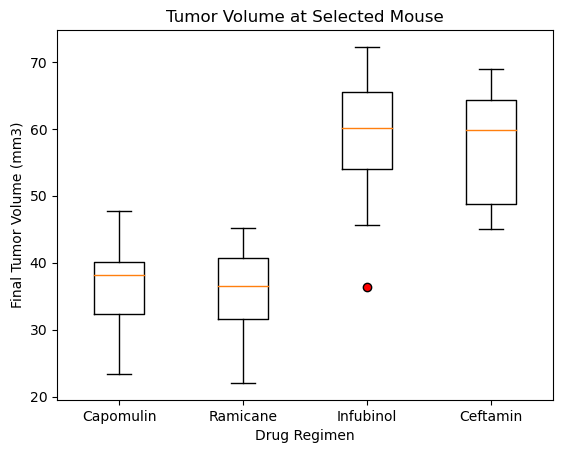

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_data_to_plot = [capomulin_tumor_volume_list, ramicane_tumor_volume_list, infubinol_tumor_volume_list, ceftamin_tumor_volume_list]
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

x_axis, y_axis = plt.subplots()
y_axis.set_title('Tumor Volume at Selected Mouse')
y_axis.set_ylabel('Final Tumor Volume (mm3)')
y_axis.set_xlabel('Drug Regimen')
y_axis.boxplot(tumor_data_to_plot, labels=drug_regimen, widths = 0.4, vert=True, flierprops={'markerfacecolor': 'red'})

plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

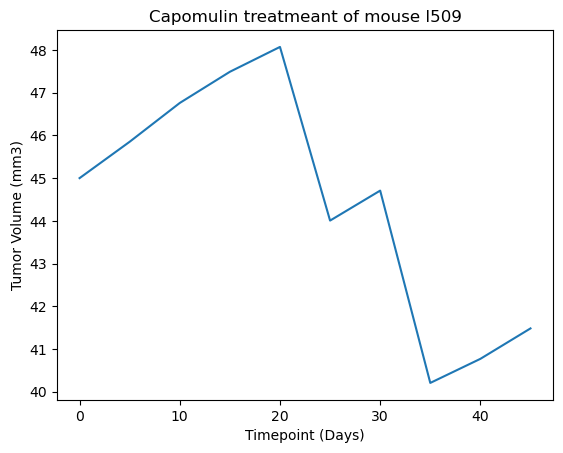

In [46]:
# Generate a line plot of tumor volume vs. time point for a single mouse (1509) treated with Capomulin

capomulin_line_plot = mice_results_capomulin.loc[mice_results_capomulin["Mouse ID"] == "l509",:]

x_values = capomulin_line_plot["Timepoint"]
y_values = capomulin_line_plot["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_values, y_values)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

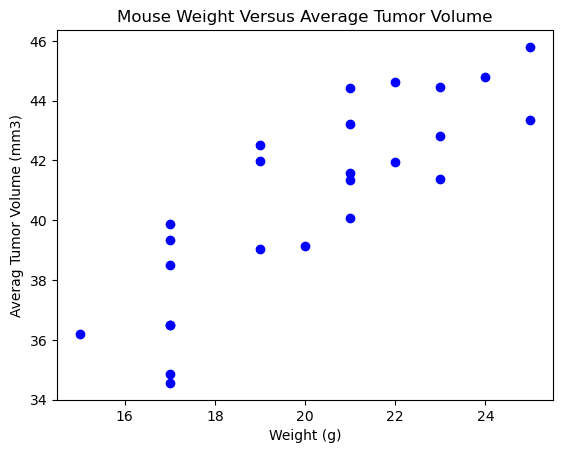

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

x_values = mice_results_capomulin["Weight (g)"].groupby(mice_results_capomulin["Mouse ID"]).mean()
y_values = mice_results_capomulin["Tumor Volume (mm3)"].groupby(mice_results_capomulin["Mouse ID"]).mean()

plt.scatter(x_values, y_values, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

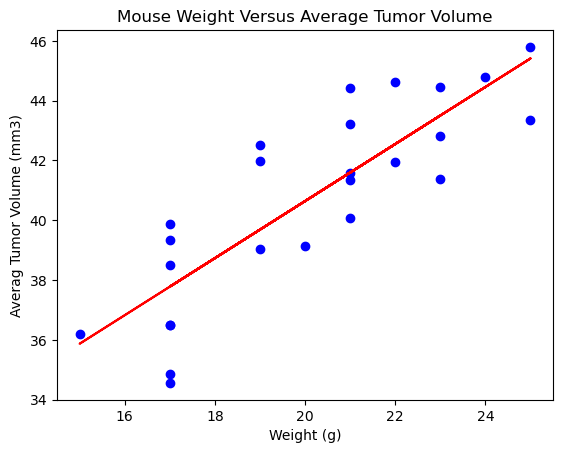

In [48]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = mice_results_capomulin["Weight (g)"].groupby(mice_results_capomulin["Mouse ID"]).mean()
y_values = mice_results_capomulin["Tumor Volume (mm3)"].groupby(mice_results_capomulin["Mouse ID"]).mean()

x_values = mice_results_capomulin["Weight (g)"].groupby(mice_results_capomulin["Mouse ID"]).mean()
y_values = mice_results_capomulin["Tumor Volume (mm3)"].groupby(mice_results_capomulin["Mouse ID"]).mean()

plt.scatter(x_values, y_values, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')

plt.ylabel('Averag Tumor Volume (mm3)')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.plot(x_values, regress_values, color = "red")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

